<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-и-анализ-данных" data-toc-modified-id="Выгрузка-и-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выгрузка и анализ данных</a></span></li><li><span><a href="#Размер-выборки" data-toc-modified-id="Размер-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Размер выборки</a></span></li><li><span><a href="#График-распределения-возраста-в-выборке" data-toc-modified-id="График-распределения-возраста-в-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>График распределения возраста в выборке</a></span></li><li><span><a href="#Напечатайте-на-экране-10–15-фотографий" data-toc-modified-id="Напечатайте-на-экране-10–15-фотографий-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Напечатайте на экране 10–15 фотографий</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Код-обучения-модели" data-toc-modified-id="Код-обучения-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Код обучения модели</a></span></li><li><span><a href="#Результат-обучения" data-toc-modified-id="Результат-обучения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Результат обучения</a></span></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

# Определение возраста покупателей

## Исследовательский анализ данных

**Заказчик** — Сетевой супермаркет «Хлеб-Соль»

**Цель исследования** 

* Внедрение системы компьютерного зрения для обработки фотографий покупателей и определения приблизительный возраста человека, что позволит улучшит как пользовательский опыт так и увеличит прибыль сети за счет: 
    * Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
    * Контролировать добросовестность кассиров при продаже алкоголя.

**Входные данные**  
* Директория ```/datasets/faces/``` - Данные взяты с сайта ChaLearn Looking at People.
* ```/final_files``` - Все изображения 
* ```labels.csv``` -  с данными о названии файла (file_name) и возрасте человека изображенного (real_age)

**Результаты исследования** — Получена модель подходящая под требования заказчика (MAE модели не больше 8)

### Выгрузка и анализ данных

In [1]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
images = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
def research(df):
    print('Информация по таблице:', '\n')
    df.info()
    print()
    print('Количество пропусков:', '\n')
    print(df.isna().sum(), '\n', '\n')
    print('Процент пропусков:', '\n')
    print(df.isna().mean()*100, '\n')

    display(df.describe(include='all'))
    print()
    print('Число явных дубликатов:', df.duplicated().sum(), '\n')

In [4]:
research(images)

Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB

Количество пропусков: 

file_name    0
real_age     0
dtype: int64 
 

Процент пропусков: 

file_name    0.0
real_age     0.0
dtype: float64 



,file_name,real_age
count,7591,7591.000000
unique,7591,NaN
top,000901.jpg,NaN
freq,1,NaN
mean,NaN,31.201159
std,NaN,17.145060
min,NaN,1.000000
25%,NaN,20.000000
50%,NaN,29.000000
75%,NaN,41.000000



Число явных дубликатов: 0 



### Размер выборки

In [5]:
images.shape

(7591, 2)

### График распределения возраста в выборке

array([[<AxesSubplot:title={'center':'real_age'}>]], dtype=object)

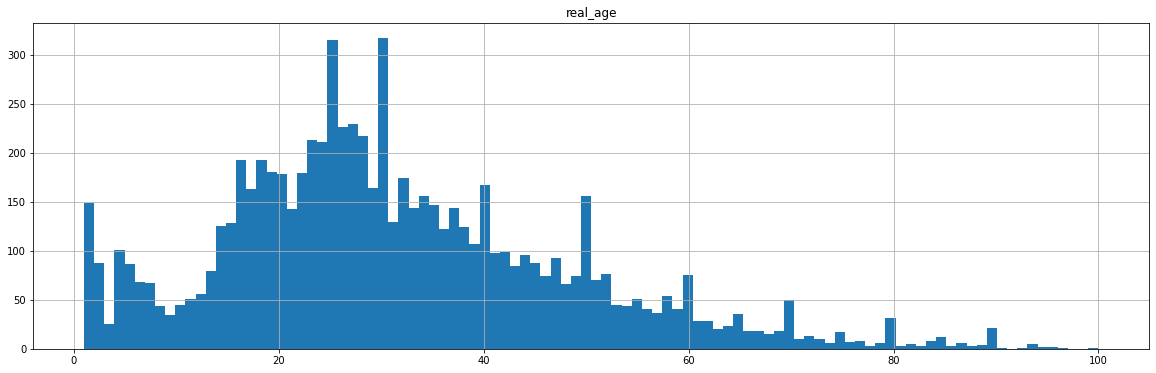

In [6]:
images.hist(bins=100, figsize = (20, 6))

In [7]:
train_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1./255)
    
validation_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1./255)

In [8]:
train_datagen_flow = train_datagen.flow_from_directory(
    '/datasets/faces/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    seed=12345)

val_datagen_flow = validation_datagen.flow_from_directory(
    '/datasets/faces/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    seed=12345)

Found 5694 images belonging to 1 classes.
Found 1897 images belonging to 1 classes.


Размер выборки совпадает = 7591 

### Напечатайте на экране 10–15 фотографий

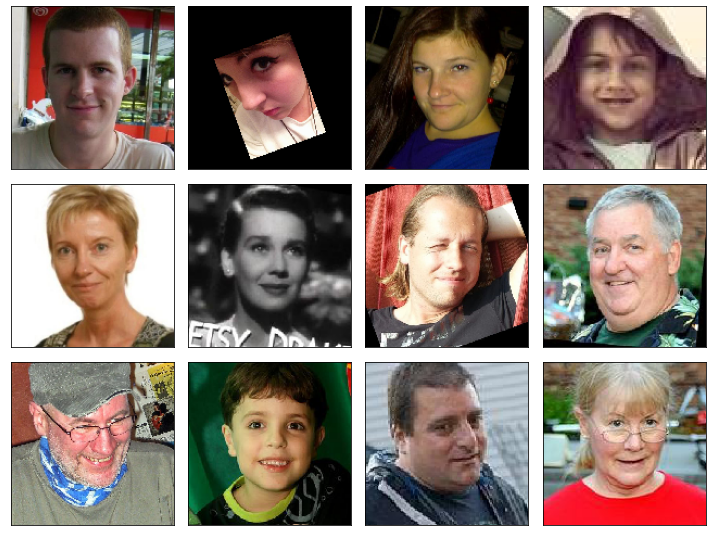

In [9]:
features, target = next(train_datagen_flow)
fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

**Промежуточные итоги:**  
* Пропусков нет, как и аномальных данных
* Самый старый человек на фото, в возрасте 100 лет (мое почтение)
* Размер выборки соствляет 7591 человек
* Средний возраст людей примерно от 18 до 30 лет, больше всего (пик 25 и 30 лет)
* Провал в 3 года, а так же в 9 лет и после 60 (будем надеяться что кассир не продаст алко 3-х годке)
* Выгрузили 12 фоток, изображения подготовлены и выравнены. 



## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

### Код обучения модели

```python

from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import pandas as pd



def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_datagen_flow
    
    
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return train_datagen_flow


def create_model(input_shape):
    
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False) 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(10, activation='relu')) 
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model


```

### Результат обучения


```
Epoch 1/10
178/178 - 49s - loss: 384.2623 - mae: 14.5121 - val_loss: 482.1025 - val_mae: 16.8850
Epoch 2/10
178/178 - 39s - loss: 74.0375 - mae: 6.4377 - val_loss: 471.1215 - val_mae: 16.6282
Epoch 3/10
178/178 - 39s - loss: 37.9447 - mae: 4.6425 - val_loss: 226.6483 - val_mae: 11.2753
Epoch 4/10
178/178 - 39s - loss: 22.5359 - mae: 3.6288 - val_loss: 122.3539 - val_mae: 8.3908
Epoch 5/10
178/178 - 38s - loss: 16.5494 - mae: 3.1309 - val_loss: 84.2446 - val_mae: 6.9781
Epoch 6/10
178/178 - 37s - loss: 12.5799 - mae: 2.7498 - val_loss: 76.1281 - val_mae: 6.5884
Epoch 7/10
178/178 - 39s - loss: 10.5516 - mae: 2.5004 - val_loss: 72.9267 - val_mae: 6.5154
Epoch 8/10
178/178 - 39s - loss: 8.6514 - mae: 2.2300 - val_loss: 70.0097 - val_mae: 6.3867
Epoch 9/10
178/178 - 40s - loss: 8.4921 - mae: 2.2026 - val_loss: 70.7143 - val_mae: 6.3464
Epoch 10/10
178/178 - 39s - loss: 7.5809 - mae: 2.0943 - val_loss: 68.1858 - val_mae: 6.2237
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 68.1858 - mae: 6.2237
Test MAE: 6.2237
```

**Промежуточный вывод:**

Итоговое значение МАЕ ```Test MAE: 6.2237```

Для постройки модели применялась архитектура ResNet50, что позволило обучить её с минимальным количеством свёрточных и полносвязных слоёв. Был использован алгоритм Adam с шагом (lr=0.0001)

При увеличении epochs до 20 существенного уменьшения MAE нет, но существенно увеличивается срок обучения (Лучший результат на 17 эпохе MAE = 6.2070)

## Анализ обученной модели

Значение MAE = 6.2237 говорит о среднем промахе в определении возраста (около 6 лет, в статье о датасете, с которой мы работали, значение MAE равно 5.4, чего тоже не достаточно). Данная погрешность может быть кретична при определнии возраста для выполнения второй задачи *"Контролировать добросовестность кассиров при продаже алкоголя."* Он может советовать или выявлять точки для дальнейшей проверки, но ни как не являться финальным этапом для вынесения приговора. Так как продажа алкоголя с 18 лет. А модель может пропустить 12 летних, так и сказать что нельзя было продавать 23 летним. 

По первой задаче такой разброс не сильно кретичен, так как могут составляться группы пользователей по возрасту (С шагом в 10 лет например или по основным покупательсим группам (Например: до 18, до 25, до 30, до 40, до 50, до 60 и старше 60)

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы